In [78]:
import re
import os
import string
import requests

from PIL import Image
from textwrap import wrap
from wordcloud import WordCloud

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words as nltk_words
from nltk.corpus import stopwords

In [33]:
nltk.download('stopwords', download_dir='../../Resources/')
nltk.download('punkt', download_dir='../../Resources/')
nltk.download('wordnet', download_dir='../../Resources/')
nltk.download('omw-1.4', download_dir='../../Resources/')
nltk.download('words', download_dir='../../Resources/')

[nltk_data] Downloading package stopwords to ../../Resources/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to ../../Resources/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to ../../Resources/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to ../../Resources/...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to ../../Resources/...
[nltk_data]   Package words is already up-to-date!


True

In [34]:
nltk.data.path.append('../../Resources/')

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
! ls ../../Data/boost_labelled

news1.csv news3.csv news5.csv news7.csv news9.csv
news2.csv news4.csv news6.csv news8.csv


In [36]:
BASIC_PATH = '../../Data/boost_labelled'

In [37]:
filenames = []

In [38]:
for filename in os.listdir(BASIC_PATH):
    if not filename.startswith('.'):
        filenames.append(f'{BASIC_PATH}/{filename}')
filenames

['../../Data/boost_labelled/news3.csv',
 '../../Data/boost_labelled/news2.csv',
 '../../Data/boost_labelled/news1.csv',
 '../../Data/boost_labelled/news5.csv',
 '../../Data/boost_labelled/news4.csv',
 '../../Data/boost_labelled/news6.csv',
 '../../Data/boost_labelled/news7.csv',
 '../../Data/boost_labelled/news9.csv',
 '../../Data/boost_labelled/news8.csv']

In [39]:
data = pd.DataFrame()
for filename in filenames:
    print('Reading', filename)
    df = pd.read_csv(filename, sep=';', header=0)
    data = pd.concat([data, df]).reset_index(drop=True)
data

Reading ../../Data/boost_labelled/news3.csv
Reading ../../Data/boost_labelled/news2.csv
Reading ../../Data/boost_labelled/news1.csv
Reading ../../Data/boost_labelled/news5.csv
Reading ../../Data/boost_labelled/news4.csv
Reading ../../Data/boost_labelled/news6.csv
Reading ../../Data/boost_labelled/news7.csv
Reading ../../Data/boost_labelled/news9.csv
Reading ../../Data/boost_labelled/news8.csv


,source,title,published_at,currencies,News value,full_news_url,description
0,Executive Chairman,RT @justmoon: This is a post I've been wanting...,2022-12-07T19:13:11Z,XRP,0.0,https://cryptopanic.com/news/17094657/RT-justm...,NaN
1,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...
2,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...
3,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre..."
4,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...
...,...,...,...,...,...,...,...
1673,Feed - Cryptopotato.Com,"OKX Proof-of-Reserves Report: Bitcoin, Ether, ...",2022-12-23T18:10:53Z,USDT,1.0,https://cryptopanic.com/news/17225884/OKX-Proo...,<p>The recently published Merkle tree PoR prog...
1674,CryptoSlate,Bitcoin miners increased hash rate and product...,2022-12-23T18:00:30Z,BTC,0.0,https://cryptopanic.com/news/17225863/Bitcoin-...,<p>The price of Bitcoin (BTC) fell by 64.68% t...
1675,Co-founder of Ethereum,Looking forward to seeing who the next CEO is ...,2022-12-23T17:57:19Z,ETH,0.0,https://cryptopanic.com/news/17225833/Looking-...,NaN
1676,The Daily Hodl,Twitter Adds Bitcoin (BTC) and Ethereum (ETH) ...,2022-12-23T17:55:29Z,"BTC,ETH",1.0,https://cryptopanic.com/news/17225843/Twitter-...,<p>Social media giant Twitter is adding Bitcoi...


/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='News value', ylabel='count'>

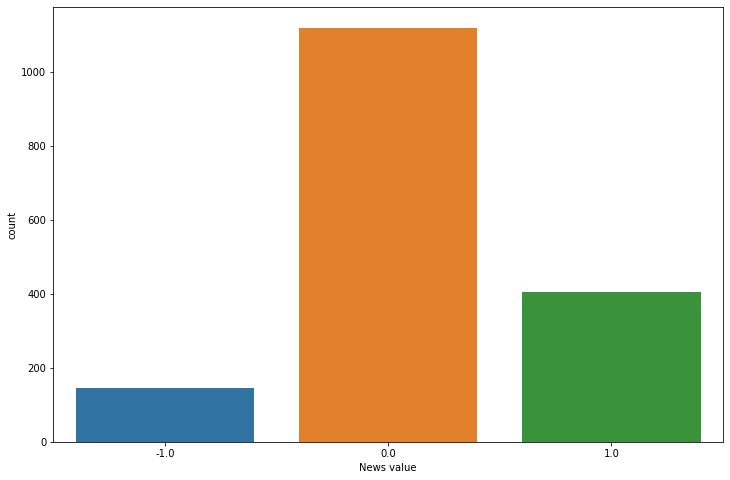

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(data['News value'])

In [41]:
data['label'] = data['News value'].apply(lambda x: 1 if x in [1, -1] else 0)

/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

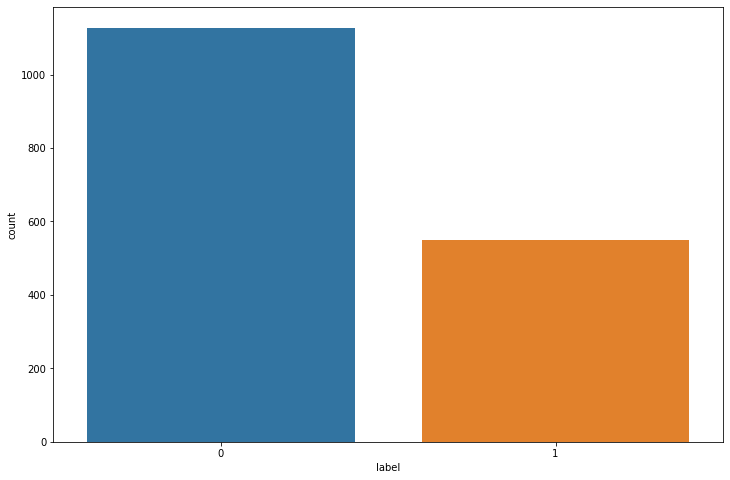

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot(data['label'])

In [43]:
from io import StringIO
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   source         1657 non-null   object 
 1   title          1668 non-null   object 
 2   published_at   1657 non-null   object 
 3   currencies     1626 non-null   object 
 4   News value     1669 non-null   float64
 5   full_news_url  1677 non-null   object 
 6   description    1357 non-null   object 
 7   label          1678 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 105.0+ KB


In [45]:
data = data[~data['description'].isna()]
data

,source,title,published_at,currencies,News value,full_news_url,description,label
1,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...,1
2,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...,0
3,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre...",0
4,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...,0
5,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,<p>Blockchain trilemma is arguably the hardest...,0
...,...,...,...,...,...,...,...,...
1668,AMBCrypto,Binance takes measures to end attacks; BNB’s o...,2022-12-23T18:30:25Z,BNB,0.0,https://cryptopanic.com/news/17225912/Binance-...,Binance clears the air of doubts about its com...,0
1670,Blockworks,"Crypto ETFs Sank in 2022, but These 3 ‘Blockch...",2022-12-23T18:16:12Z,BTC,0.0,https://cryptopanic.com/news/17225879/Crypto-E...,<p>Amplify’s actively managed BLOK fund is dow...,0
1673,Feed - Cryptopotato.Com,"OKX Proof-of-Reserves Report: Bitcoin, Ether, ...",2022-12-23T18:10:53Z,USDT,1.0,https://cryptopanic.com/news/17225884/OKX-Proo...,<p>The recently published Merkle tree PoR prog...,1
1674,CryptoSlate,Bitcoin miners increased hash rate and product...,2022-12-23T18:00:30Z,BTC,0.0,https://cryptopanic.com/news/17225863/Bitcoin-...,<p>The price of Bitcoin (BTC) fell by 64.68% t...,0


In [46]:
data = data.drop_duplicates(['description'])
data

,source,title,published_at,currencies,News value,full_news_url,description,label
1,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...,1
2,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...,0
3,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre...",0
4,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...,0
5,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,<p>Blockchain trilemma is arguably the hardest...,0
...,...,...,...,...,...,...,...,...
1654,U.Today,Ethereum (ETH) Price Analysis for December 23,2022-12-23T20:00:00Z,ETH,0.0,https://cryptopanic.com/news/17226113/Ethereum...,<p>How great are chances for continued rise of...,0
1657,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,2022-12-23T19:47:30Z,"ETH,XRP",0.0,https://cryptopanic.com/news/17226085/Digital-...,The Financial Stability Oversight Council (FSO...,0
1658,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",2022-12-23T19:41:41Z,"BTC,ETH,ADA,LTC,XMR",1.0,https://cryptopanic.com/news/17226084/Cardano-...,<p>A top executive of peer-to-peer crypto exch...,1
1660,ZyCrypto,Binance plans to invest in India’s web3 startu...,2022-12-23T19:24:08Z,"BTC,ETH,XRP",1.0,https://cryptopanic.com/news/17226053/Binance-...,Binance’s Chief Technology Officer (CTO) Rohit...,1


In [47]:
data['description'] = data['description'].apply(strip_tags)
data = data.reset_index(drop=True)
data

/var/folders/l4/kkbfk_xs52n01x_2cs6bv8g40000gp/T/ipykernel_3911/4016395430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['description'] = data['description'].apply(strip_tags)


,source,title,published_at,currencies,News value,full_news_url,description,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,BTC bulls could secure a $130 million profit i...,1
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,Top US crypto exchange Coinbase has given supp...,0
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"December 5, 2022 As simplified wallet addresse...",0
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,A bill that would create new licensing and ele...,0
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,Blockchain trilemma is arguably the hardest te...,0
...,...,...,...,...,...,...,...,...
1331,U.Today,Ethereum (ETH) Price Analysis for December 23,2022-12-23T20:00:00Z,ETH,0.0,https://cryptopanic.com/news/17226113/Ethereum...,How great are chances for continued rise of Et...,0
1332,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,2022-12-23T19:47:30Z,"ETH,XRP",0.0,https://cryptopanic.com/news/17226085/Digital-...,The Financial Stability Oversight Council (FSO...,0
1333,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",2022-12-23T19:41:41Z,"BTC,ETH,ADA,LTC,XMR",1.0,https://cryptopanic.com/news/17226084/Cardano-...,A top executive of peer-to-peer crypto exchang...,1
1334,ZyCrypto,Binance plans to invest in India’s web3 startu...,2022-12-23T19:24:08Z,"BTC,ETH,XRP",1.0,https://cryptopanic.com/news/17226053/Binance-...,Binance’s Chief Technology Officer (CTO) Rohit...,1


In [48]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf_vectorizer

TfidfVectorizer(stop_words='english')

In [49]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])
tfidf_matrix

<1336x6307 sparse matrix of type '<class 'numpy.float64'>'
	with 29874 stored elements in Compressed Sparse Row format>

In [50]:
tfidf_data = pd.DataFrame(tfidf_matrix.toarray())
tfidf_data

,0,1,2,3,4,5,6,7,8,9,...,6297,6298,6299,6300,6301,6302,6303,6304,6305,6306
0,0.0,0.15315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1332,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '00001', ..., 'zksync', 'zone', 'zuckerberg'],
      dtype=object)

In [52]:
tfidf_data.columns = feature_names
tfidf_data

,00,000,00001,01,018,02,03,030,04,05,...,zeldin,zero,zhao,zilliqa,zk,zk_nhpq0,zkevm,zksync,zone,zuckerberg
0,0.0,0.15315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1332,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
names = [
    'Nearest Neighbors',
    'Linear SVM',
    'RBF SVM',
    'Gaussian Process',
    'Decision Tree',
    'Random Forest',
    'Neural Net',
    'AdaBoost',
    'QDA',
]

grids = {
    'Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'p': [1, 2]
    },
    'Linear SVM': {
        'kernel': ['linear'],
        'C': [0.025, 0.25, 0.5, 1]
    },
    'RBF SVM': {
        'gamma': [1, 2, 'scale'],
        'C': [0.025, 0.25, 0.5, 1]
    },
    'Gaussian Process': {
        'kernel': [1.0 * RBF(1.0)]
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [5, 15, 50],
        'min_samples_split': [2, 4, 8]
    },
    'Random Forest': {
        'n_estimators': [10, 100, 500],
        'max_depth': [5, 15, 50],
        'max_features': [1, 'sqrt']
    },
    'Neural Net': {
        'alpha': [0.25, 0.5, 1],
        'max_iter': [1000]
    },
    'AdaBoost': {
        'n_estimators': [10, 100, 500],
        'learning_rate': [0.01, 0.1, 1]
    },
    'QDA': {}
}

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
]

In [98]:
tsvd = TruncatedSVD(n_components=75, random_state=37)
vec_matrix_tsvd = tsvd.fit_transform(tfidf_matrix)
vec_matrix_tsvd

array([[ 0.17329241,  0.04278333,  0.16891722, ...,  0.00882363,
        -0.05418867, -0.00808832],
       [ 0.18637069, -0.03677898, -0.1624106 , ..., -0.04009518,
         0.04364162, -0.00947647],
       [ 0.06710202, -0.05367554, -0.10404048, ..., -0.0089923 ,
         0.06480064, -0.01550885],
       ...,
       [ 0.15839463, -0.13107281, -0.04653511, ..., -0.07953805,
        -0.00216124, -0.10456824],
       [ 0.02807322, -0.03386482, -0.02675242, ...,  0.01113162,
        -0.05561252, -0.00180919],
       [ 0.04539445, -0.0480636 , -0.03308421, ..., -0.04779032,
         0.02538924, -0.00693943]])

In [99]:
vec_matrix_tsvd.shape

(1336, 75)

In [100]:
X, y = vec_matrix_tsvd, data['label']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

In [102]:
results = dict()

In [108]:
for name, clf in zip(names, classifiers):
    print('*' * 30, '--> Classifying with', name, '*' * 30)
    
    grid = GridSearchCV(clf, grids[name], refit=True, verbose=3, n_jobs=-1) 
   
    # fitting the model for grid search 
    grid.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid.best_params_) 

    score = grid.score(X_test, y_test)
    y_pred = grid.predict(X_test)
    print('--> Score', score)
    results[name] = classification_report(y_test, y_pred)

****************************** --> Classifying with Nearest Neighbors ******************************
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_neighbors': 7, 'p': 1}
--> Score 0.6658354114713217
****************************** --> Classifying with Linear SVM ******************************
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'C': 1, 'kernel': 'linear'}
--> Score 0.6807980049875312
****************************** --> Classifying with RBF SVM ******************************
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 1, 'gamma': 'scale'}
--> Score 0.7281795511221946
****************************** --> Classifying with Gaussian Process ******************************
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'kernel': 1**2 * RBF(length_scale=1)}
--> Score 0.7107231920199502
****************************** --> Classifying with Decision Tree ******************************
Fitting 5 folds for each of 27 candidat

In [110]:
for key, res in results.items():
    print('--> Model', key)
    print(res)

--> Model Nearest Neighbors
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       262
           1       0.53      0.36      0.43       139

    accuracy                           0.67       401
   macro avg       0.62      0.59      0.60       401
weighted avg       0.65      0.67      0.65       401

--> Model Linear SVM
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       262
           1       0.70      0.14      0.23       139

    accuracy                           0.68       401
   macro avg       0.69      0.55      0.51       401
weighted avg       0.69      0.68      0.60       401

--> Model RBF SVM
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       262
           1       0.70      0.37      0.49       139

    accuracy                           0.73       401
   macro avg       0.72      0.65      0.65       401
weighte

In [111]:
data['combined'] = 'Source: ' + data['source'] + ' Title: ' + data['title'] + ' Description: ' + data['description']
data['combined']

0       Source: CoinTelegraph Title: Bitcoin options d...
1       Source: The Daily Hodl Title: Crypto Exchange ...
2       Source: The Daily Hodl Title: BitKeep Wallet G...
3       Source: Bitcoin Magazine Title: Kazakhstan Pre...
4       Source: CoinTelegraph Title: The blockchain tr...
                              ...                        
1331    Source: U.Today Title: Ethereum (ETH) Price An...
1332    Source: ZyCrypto Title: Digital Assets Amongst...
1333    Source: The Daily Hodl Title: Cardano, Litecoi...
1334    Source: ZyCrypto Title: Binance plans to inves...
1335    Source: ZyCrypto Title: Regulation Alone Isn’t...
Name: combined, Length: 1336, dtype: object

In [112]:
data = data[~data['combined'].isna()]
data['combined']

0       Source: CoinTelegraph Title: Bitcoin options d...
1       Source: The Daily Hodl Title: Crypto Exchange ...
2       Source: The Daily Hodl Title: BitKeep Wallet G...
3       Source: Bitcoin Magazine Title: Kazakhstan Pre...
4       Source: CoinTelegraph Title: The blockchain tr...
                              ...                        
1331    Source: U.Today Title: Ethereum (ETH) Price An...
1332    Source: ZyCrypto Title: Digital Assets Amongst...
1333    Source: The Daily Hodl Title: Cardano, Litecoi...
1334    Source: ZyCrypto Title: Binance plans to inves...
1335    Source: ZyCrypto Title: Regulation Alone Isn’t...
Name: combined, Length: 1318, dtype: object

In [113]:
data_input = data[['combined', 'label']].copy()
data_input.columns = ['text', 'label']
data_input['text'] = data_input['text']
data_input['label'] = data_input['label']
data_input

,text,label
0,Source: CoinTelegraph Title: Bitcoin options d...,1
1,Source: The Daily Hodl Title: Crypto Exchange ...,0
2,Source: The Daily Hodl Title: BitKeep Wallet G...,0
3,Source: Bitcoin Magazine Title: Kazakhstan Pre...,0
4,Source: CoinTelegraph Title: The blockchain tr...,0
...,...,...
1331,Source: U.Today Title: Ethereum (ETH) Price An...,0
1332,Source: ZyCrypto Title: Digital Assets Amongst...,0
1333,"Source: The Daily Hodl Title: Cardano, Litecoi...",1
1334,Source: ZyCrypto Title: Binance plans to inves...,1


/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

[CV 4/5] END ................n_neighbors=3, p=1;, score=0.545 total time=   0.0s
[CV 4/5] END ................n_neighbors=5, p=1;, score=0.567 total time=   0.0s
[CV 5/5] END ................n_neighbors=5, p=2;, score=0.604 total time=   0.0s
[CV 2/5] END ................n_neighbors=7, p=2;, score=0.668 total time=   0.0s
[CV 2/5] END ............C=0.025, kernel=linear;, score=0.620 total time=   0.0s
[CV 3/5] END .............C=0.25, kernel=linear;, score=0.620 total time=   0.0s
[CV 5/5] END ..............C=0.5, kernel=linear;, score=0.620 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.626 total time=   0.0s
[CV 4/5] END ..................C=0.025, gamma=1;, score=0.620 total time=   0.1s
[CV 1/5] END ..............C=0.025, gamma=scale;, score=0.620 total time=   0.1s
[CV 4/5] END ...................C=0.25, gamma=1;, score=0.615 total time=   0.1s
[CV 5/5] END ...................C=0.25, gamma=1;, score=0.626 total time=   0.1s
[CV 5/5] END ...............

/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

[CV 1/5] END ................n_neighbors=3, p=1;, score=0.647 total time=   0.0s
[CV 2/5] END ................n_neighbors=5, p=1;, score=0.642 total time=   0.0s
[CV 1/5] END ................n_neighbors=7, p=1;, score=0.615 total time=   0.0s
[CV 3/5] END ................n_neighbors=7, p=2;, score=0.663 total time=   0.0s
[CV 5/5] END ............C=0.025, kernel=linear;, score=0.626 total time=   0.0s
[CV 1/5] END ..............C=0.5, kernel=linear;, score=0.620 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.636 total time=   0.0s
[CV 5/5] END ..................C=0.025, gamma=1;, score=0.626 total time=   0.1s
[CV 3/5] END ..............C=0.025, gamma=scale;, score=0.620 total time=   0.1s
[CV 3/5] END ...................C=0.25, gamma=2;, score=0.620 total time=   0.1s
[CV 4/5] END ...................C=0.25, gamma=2;, score=0.615 total time=   0.1s
[CV 4/5] END ....................C=0.5, gamma=2;, score=0.626 total time=   0.1s
[CV 5/5] END ...............

/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

[CV 5/5] END ................n_neighbors=3, p=1;, score=0.599 total time=   0.0s
[CV 1/5] END ................n_neighbors=5, p=2;, score=0.642 total time=   0.0s
[CV 2/5] END ................n_neighbors=7, p=1;, score=0.658 total time=   0.0s
[CV 4/5] END ................n_neighbors=7, p=2;, score=0.642 total time=   0.0s
[CV 1/5] END .............C=0.25, kernel=linear;, score=0.620 total time=   0.0s
[CV 4/5] END ..............C=0.5, kernel=linear;, score=0.610 total time=   0.0s
[CV 1/5] END ..................C=0.025, gamma=1;, score=0.620 total time=   0.1s
[CV 4/5] END ..................C=0.025, gamma=2;, score=0.620 total time=   0.1s
[CV 2/5] END ...................C=0.25, gamma=1;, score=0.620 total time=   0.0s
[CV 3/5] END ...................C=0.25, gamma=1;, score=0.620 total time=   0.1s
[CV 3/5] END ....................C=0.5, gamma=1;, score=0.631 total time=   0.1s
[CV 4/5] END ....................C=0.5, gamma=1;, score=0.626 total time=   0.0s
[CV 4/5] END ...............

/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

[CV 3/5] END ................n_neighbors=3, p=1;, score=0.545 total time=   0.0s
[CV 5/5] END ................n_neighbors=5, p=1;, score=0.620 total time=   0.0s
[CV 4/5] END ................n_neighbors=7, p=1;, score=0.663 total time=   0.0s
[CV 3/5] END ..............C=0.5, kernel=linear;, score=0.620 total time=   0.0s
[CV 3/5] END ..................C=0.025, gamma=1;, score=0.620 total time=   0.1s
[CV 2/5] END ..............C=0.025, gamma=scale;, score=0.620 total time=   0.1s
[CV 5/5] END ...................C=0.25, gamma=2;, score=0.620 total time=   0.1s
[CV 1/5] END ...............C=0.25, gamma=scale;, score=0.631 total time=   0.1s
[CV 3/5] END ................C=0.5, gamma=scale;, score=0.615 total time=   0.1s
[CV 4/5] END ................C=0.5, gamma=scale;, score=0.620 total time=   0.1s
[CV 5/5] END ......................C=1, gamma=2;, score=0.610 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.594 total time=   0.0s
[CV 1/5] END c

/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

In [114]:
data_input.to_csv('./output/classification/source_title_description_bin_clf.csv', index=False)